In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from patsy import dmatrix
%matplotlib inline

import pylab 
import scipy.stats as stats

In [2]:
ipos = pd.read_csv("ipo_data.csv")

In [3]:
# delete all the "$" sambols
# ipos.applymap(lambda x: x if not "$" in str(x)else x.replace("$",""))
ipos = ipos.applymap(lambda x: x if not "$" in str(x)else x.replace("$",""))

In [4]:
# delete all the "%" sambols
# ipos.applymap(lambda x: x if not "%" in str(x)else x.replace("%",""))
ipos = ipos.applymap(lambda x: x if not "%" in str(x)else x.replace("%",""))

In [5]:
ipos[:5]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/8/19,MMTEC,MTC,WestPark Capital,4.00,5.91,7.55,88.75,1.91,3.55,N/C,NaN
1,1/29/19,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.00,10.00,10.01,0.10,0.00,0.01,1,NaN
2,1/30/19,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.00,20.00,20.20,1.00,0.00,0.20,1,NaN
3,1/31/19,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.00,13.25,13.07,-6.64,-0.75,-0.93,1,NaN
4,1/31/19,Pivotal Acquisition,PVT.U,Cantor,10.00,10.05,10.10,1.00,0.05,0.10,1,NaN


In [6]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 12 columns):
Trade Date                  3232 non-null object
Issuer                      3232 non-null object
Symbol                      3232 non-null object
Lead/Joint-Lead Managers    3232 non-null object
Offer Price                 3230 non-null object
Opening Price               3230 non-null object
1st Day Close               3231 non-null object
1st Day % Px Chng           3229 non-null object
$ Change Opening            3230 non-null object
$ Change Close              3230 non-null object
Star Ratings                3230 non-null object
Performed                   371 non-null object
dtypes: object(12)
memory usage: 303.1+ KB


In [7]:
ipos.replace('N/C',0, inplace=True)

In [8]:
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Change Close'] = ipos['$ Change Close'].astype('float')
ipos['$ Change Opening'] = ipos['$ Change Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('float')

In [9]:
ipos[:5]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.0,5.91,7.55,88.75,1.91,3.55,0.0,NaN
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0,10.00,10.01,0.10,0.00,0.01,1.0,NaN
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0,20.00,20.20,1.00,0.00,0.20,1.0,NaN
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0,13.25,13.07,-6.64,-0.75,-0.93,1.0,NaN
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0,10.05,10.10,1.00,0.05,0.10,1.0,NaN


In [10]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 12 columns):
Trade Date                  3232 non-null datetime64[ns]
Issuer                      3232 non-null object
Symbol                      3232 non-null object
Lead/Joint-Lead Managers    3232 non-null object
Offer Price                 3230 non-null float64
Opening Price               3230 non-null float64
1st Day Close               3231 non-null float64
1st Day % Px Chng           3229 non-null float64
$ Change Opening            3230 non-null float64
$ Change Close              3230 non-null float64
Star Ratings                3230 non-null float64
Performed                   371 non-null object
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 303.1+ KB


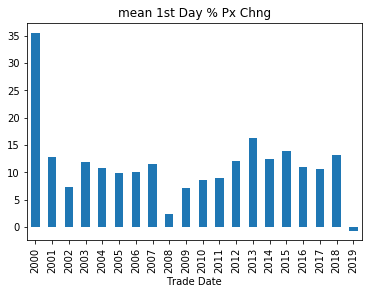

In [11]:
ipos.groupby(ipos['Trade Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar', title="mean 1st Day % Px Chng")

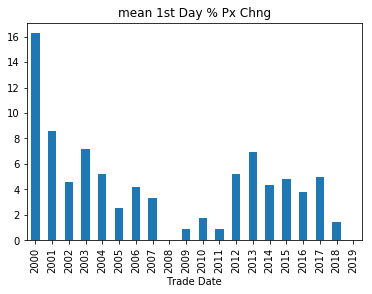

In [12]:
ipos.groupby(ipos['Trade Date'].dt.year)['1st Day % Px Chng'].median().plot(kind='bar', title="mean 1st Day % Px Chng")

In [13]:
ipos['1st Day % Px Chng'].describe()

count    3229.000000
mean       13.001182
std        27.349681
min      -100.000000
25%         0.000000
50%         4.180000
75%        18.920000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

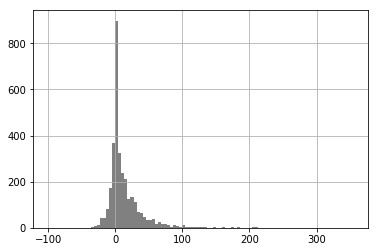

In [14]:
ipos['1st Day % Px Chng'].hist(bins=100, color='grey')

In [15]:
# change of open to close in %
ipos["cotc"] = (ipos['Opening Price']/ipos['1st Day Close']-1)*100
ipos[:5]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,cotc
0,2019-01-08,MMTEC,MTC,WestPark Capital,4.0,5.91,7.55,88.75,1.91,3.55,0.0,NaN,-21.721854
1,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0,10.00,10.01,0.10,0.00,0.01,1.0,NaN,-0.099900
2,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0,20.00,20.20,1.00,0.00,0.20,1.0,NaN,-0.990099
3,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0,13.25,13.07,-6.64,-0.75,-0.93,1.0,NaN,1.377200
4,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0,10.05,10.10,1.00,0.05,0.10,1.0,NaN,-0.495050


In [16]:
ipos['cotc'].describe()

count    3230.000000
mean       -0.299419
std         9.627022
min       -61.452096
25%        -3.765954
50%         0.000000
75%         2.972973
max        97.165633
Name: cotc, dtype: float64

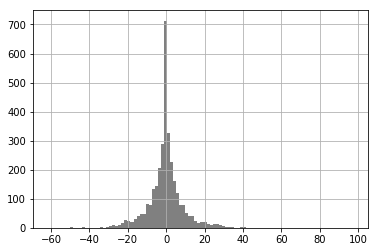

In [17]:
ipos['cotc'].hist(bins=100, color='grey')

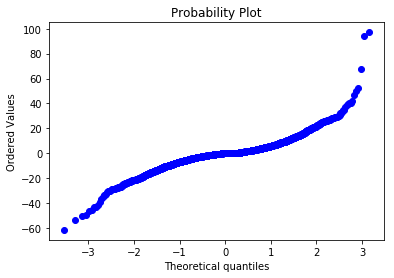

In [18]:
# QQ-plot
stats.probplot(ipos['cotc'], dist = "norm", plot=pylab)
pylab.show()

In [19]:
# Feature engineering
# get sp500 daily
sp = pd.read_csv('sp500.csv')
sp.sort_values('Date', inplace=True)
sp = sp[1:]

In [20]:
sp[-5:]

,Date,Open,High,Low,Close,Adj Close,Volume
4816,2019-02-25,2804.350098,2813.489990,2794.989990,2796.110107,2796.110107,3804380000
4817,2019-02-26,2792.360107,2803.120117,2789.469971,2793.899902,2793.899902,3645680000
4818,2019-02-27,2787.500000,2795.760010,2775.129883,2792.379883,2792.379883,3767130000
4819,2019-02-28,2788.110107,2793.729980,2782.510010,2784.489990,2784.489990,4396930000
4820,2019-03-01,2798.219971,2808.020020,2787.379883,2803.689941,2803.689941,3972280000


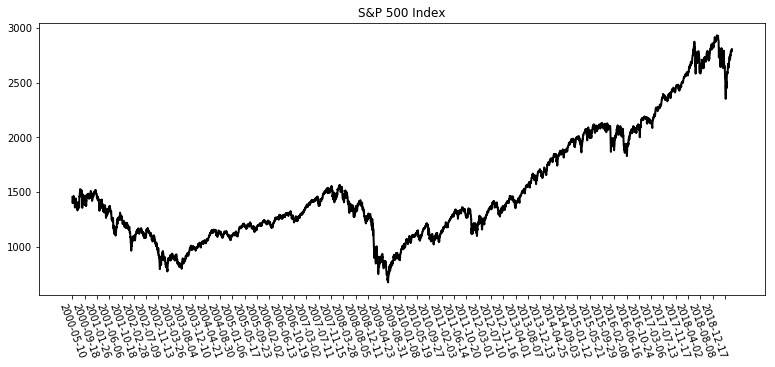

In [21]:
all_dates = sp[['Date']]
tkr_index = [x for x in all_dates.index if x % 15 == 0]
all_dates.loc[tkr_index]
fig, ax = plt.subplots(figsize=(13,5))
ax.set_title('S&P 500 Index')
ax.plot(sp['Close'], color='k', linewidth=2)
ax.set_xticks(np.arange(0,len(sp),90));
ax.set_xticklabels([sp['Date'][x] for x in sp[['Date']].index if x % 90 == 0], rotation=-70);

In [22]:
def get_week_chg(ipo_dt):
    try:
        # index
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        # index
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 8
        # change of the above two
        chg = (sp.iloc[day_ago_idx]['Close'] - sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [23]:
ipos['spwc'] = ipos['Trade Date'].map(get_week_chg)

error 2019-02-24
error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [24]:
ipos[ipos['Trade Date'] == pd.to_datetime('2019-02-24')]
ipos.loc[16, 'Trade Date'] = pd.to_datetime('2019-02-15')

In [25]:
ipos[ipos['Trade Date'] == pd.to_datetime('2015-02-21')]
ipos.loc[566, 'Trade Date'] = pd.to_datetime('2015-02-23')
ipos.loc[567, 'Trade Date'] = pd.to_datetime('2015-02-23')

In [26]:
ipos[ipos['Trade Date'] == pd.to_datetime('2013-11-16')]
ipos.loc[1195, 'Trade Date'] = pd.to_datetime('2013-11-08')

In [27]:
ipos[ipos['Trade Date'] == pd.to_datetime('2009-08-01')]
ipos.loc[1694, 'Trade Date'] = pd.to_datetime('2009-08-21')

In [28]:
ipos['spwc'] = ipos['Trade Date'].map(get_week_chg)

In [29]:
def get_cto_chg(ipo_dt):
    try:
        today_open_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

In [30]:
ipos.drop(axis=0, index=24, inplace=True)

In [31]:
ipos['spcoc'] = ipos['Trade Date'].map(get_cto_chg)

In [32]:
# Lead/Joint-Lead Managers data
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x:x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x:x.strip())

In [33]:
# copy codes, rename the bank names

In [34]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [35]:
ipos['Lead/Joint-Lead Managers'].unique()

array(['WestPark Capital', 'Cowen/ Craig-Hallum Capital Group',
       'UBS Investment Bank/ BofA Merrill Lynch/ Morgan Stanley/ Wells Fargo Securities/ RBC Capital Markets/ Stifel',
       ..., 'Utendhal Capital Partners', 'BBVA/CSFB',
       'Goldman Sachs/Lazard'], dtype=object)

In [36]:
# number of Lead-Lead Managers
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [37]:
# deal with the date things
ipos['Week Day'] = ipos['Trade Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})

In [38]:
ipos['Month'] = ipos['Trade Date'].map(lambda x: x.month)

In [39]:
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

In [40]:
# change opening/open price
ipos['Gap Open Pct'] = (ipos['$ Change Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100

In [41]:
# issue to close change
ipos['Open to Close Pct'] = (ipos['$ Change Opening'].astype('float') - ipos['$ Change Close'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

In [42]:
ipos.columns

Index(['Trade Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead Managers',
       'Offer Price', 'Opening Price', '1st Day Close', '1st Day % Px Chng',
       '$ Change Opening', '$ Change Close', 'Star Ratings', 'Performed',
       'cotc', 'spwc', 'spcoc', 'Lead Mgr', 'Total Underwriters', 'Week Day',
       'Month', 'Gap Open Pct', 'Open to Close Pct'],
      dtype='object')

In [43]:
# delete the wrong data from ipos
ipos.drop([12,13,14], inplace=True)
ipos.reset_index(drop=True, inplace=True)

In [44]:
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Change Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("spcoc") + Q("spwc")', data=ipos, return_type='dataframe')

In [45]:
# Before index 428 is after 2017(0101) IPO, or before 2017(0101)
idx = 428
# before 2017: train
# after 2017 (contain): test
X_train = X[idx:]
X_test = X[:idx]
# cotc > but: buy it
buy = 1
y_train = ipos['cotc'][idx:].map(lambda x: 1 if x >= buy else 0)
y_test = ipos['cotc'][:idx].map(lambda x: 1 if x >= buy else 0)

In [46]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/python3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
clf.score(X_test, y_test)

0.6285046728971962

In [48]:
ipos[(ipos['Trade Date']>='2017-01-01')]['cotc'].describe()

count    429.000000
mean       0.281240
std        9.801567
min      -43.018159
25%       -2.608696
50%        0.000000
75%        3.349964
max       35.041322
Name: cotc, dtype: float64

In [49]:
# pl: predict label
# tl: test label (read)
pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index, ipos.iloc[y_test.index]['cotc']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])

In [50]:
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[:5]

,index,$ chg,predicted,actual,correct
0,0,-21.721854,0,0,1
1,1,-0.099900,0,0,1
2,2,-0.990099,1,0,0
3,3,1.377200,0,1,0
4,4,-0.495050,0,0,1


In [51]:
rf[rf['predicted']==1]['$ chg'].sum()

-21.84639321552978

In [52]:
ipos[(ipos['Trade Date']>='2017-01-01')]['cotc'].sum()

120.65179261060482

In [53]:
rf[rf['predicted']==1]['$ chg'].describe()

count    10.000000
mean     -2.184639
std      11.626122
min     -17.510040
25%     -11.695167
50%      -1.078707
75%       5.885962
max      18.518519
Name: $ chg, dtype: float64

In [54]:
# all: mean = 0.2812

# buy = 0.25
# strategy: mean = 0.5804

# buy = 1
# strategy: mean = -2.18

Text(0.5, 0, 'Index')

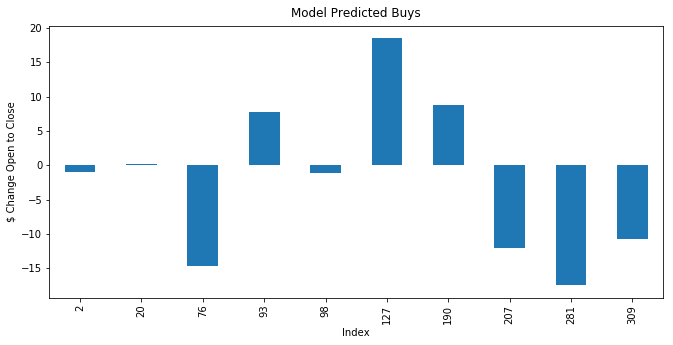

In [55]:
fig, ax = plt.subplots(figsize=(11,5))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [56]:
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)[:5]

,Coef,Feature
0,1.321354,"Q(""Lead Mgr"")[T.Feltl & Co.]"
1,1.242563,"Q(""Lead Mgr"")[T.Leerink Partners]"
2,0.975289,"Q(""Lead Mgr"")[T.Axiom Capital Management]"
3,0.918412,"Q(""Lead Mgr"")[T.Johnson Rice]"
4,0.829852,"Q(""Lead Mgr"")[T.Dawson James Securities]"


In [57]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,0.066621,"Q(""Week Day"")[T.Mon]"
13,0.032937,"Q(""Week Day"")[T.Thurs]"
14,-0.047538,"Q(""Week Day"")[T.Tues]"
15,0.159165,"Q(""Week Day"")[T.Wed]"


In [58]:
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]

,Trade Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,Performed,cotc,spwc,spcoc,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
1458,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,-0.25,0.00,...,NaN,-1.666667,1.203782,-0.041957,Morgan Keegan,1,Wed,Jun,-1.694915,-1.694915
1810,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,NaN,-4.098361,-0.407480,-0.008279,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,-4.273504
2400,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,NaN,-16.166667,0.381750,0.000000,"C.E. Unterberg, Towbin",2,Thurs,Aug,0.596421,-19.284294
2848,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,NaN,-3.421634,2.359266,0.000000,Morgan Keegan,2,Tues,May,5.714286,-3.542857
2929,2001-05-23,Smith & Wollensky,SWRG,CE Unterberg Towbin,8.5,8.51,7.77,-8.59,0.01,-0.73,...,NaN,9.523810,3.213176,0.000000,CE Unterberg Towbin,1,Wed,May,0.117509,8.695652
2987,2001-12-14,Northwest Biotherapeutics,NWBT,"C.E. Unterberg, Towbin",5.0,5.10,5.31,6.20,0.10,0.31,...,NaN,-3.954802,-4.038109,0.000000,"C.E. Unterberg, Towbin",1,Fri,Dec,1.960784,-4.117647
3119,2000-08-09,Millennium Cell,MCEL,Morgan Keegan,10.0,10.00,10.00,0.00,0.00,0.00,...,NaN,0.000000,2.938158,0.000000,Morgan Keegan,1,Wed,Aug,0.000000,0.000000
3149,2000-08-25,ServiceWare Technologies,SVCW,"C.E. Unterberg, Towbin",7.0,8.50,8.75,25.00,1.50,1.75,...,NaN,-2.857143,1.797478,0.000000,"C.E. Unterberg, Towbin",1,Fri,Aug,17.647059,-2.941176


In [79]:
# use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=500)
model = clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.5981308411214953

In [81]:
pred_label_rf = model.predict(X_test)
results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.iloc[y_test.index]['cotc']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf2.sort_values('$ chg', ascending=False)[:5]

,index,$ chg,predicted,actual,correct
395,395,35.041322,1,1,1
192,192,30.841121,0,1,0
17,17,29.411765,0,1,0
328,328,27.314815,0,1,0
193,193,26.782884,0,1,0


In [82]:
rf2[rf2['predicted']==1]['$ chg'].sum()

-66.06198849426232

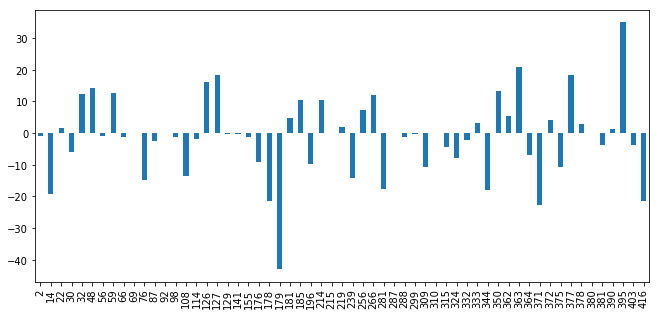

In [84]:
rf2[rf2['predicted']==1]['$ chg'].plot(kind='bar', figsize=(11,5))

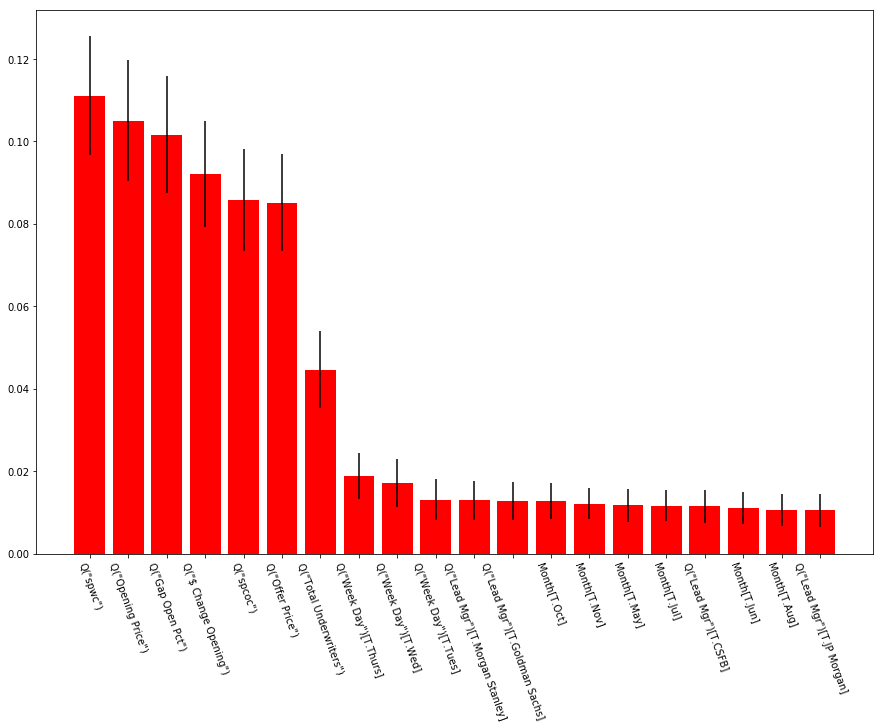

In [85]:
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);